# Dataset
https://datasetsearch.research.google.com/search?src=0&query=remote%20sensing&docid=L2cvMTFuZzczanpxNQ%3D%3D

https://www.kaggle.com/datasets/essea0/remote-sensing-dataset

In [3]:
from fastai.vision.all import *

In [4]:
path = "content/data/patches_256_v2/"

In [5]:
image_loader = ImageDataLoaders.from_name_func(
    path, get_image_files(path), valid_pct=0.2, seed=11, label_func=lambda x: "image"
)

In [6]:
image_loader

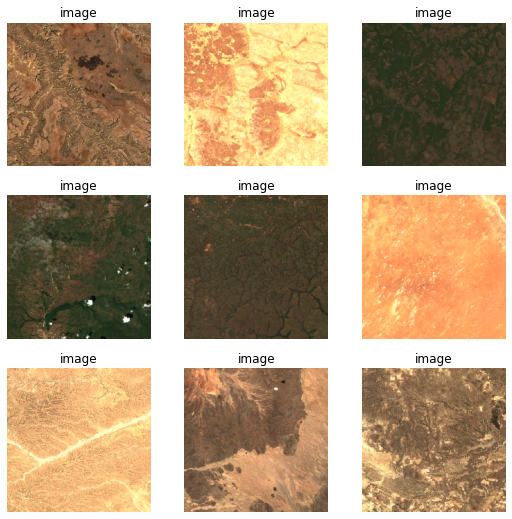

In [7]:
image_loader.show_batch()

In [8]:
learn = cnn_learner(image_loader, resnet18, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /home2/s.ranjan/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:01<00:00, 34.2MB/s]


In [9]:
learn.fine_tune(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.000000,0.000000,0.000000,00:27


epoch,train_loss,valid_loss,error_rate,time
0,0.000000,0.000000,0.000000,00:31


# New

In [19]:
bs, size=32, 256
arch = models.resnet34

In [25]:
src = ImageDataLoaders.from_name_func(
    path, get_image_files(path), valid_pct=0.2, seed=11, label_func=lambda x: "image"
)

In [26]:
def get_data(bs,size):
    data = (src
           .transform(get_transforms(max_zoom=2.), size=size, tfm_y=True)
           .databunch(bs=bs).normalize(imagenet_stats, do_y=True))

    data.c = 3
    return data

In [27]:
data = get_data(bs,size)

NameError: name 'get_transforms' is not defined

In [10]:
learn = unet_learner(image_loader, models.resnet18, metrics=accuracy)

In [15]:
learn.fine_tune(1)

epoch,train_loss,valid_loss,accuracy,time


RuntimeError: CUDA out of memory. Tried to allocate 1.50 GiB (GPU 0; 10.92 GiB total capacity; 8.11 GiB already allocated; 63.00 MiB free; 10.03 GiB reserved in total by PyTorch) If reserved memory is >> allocated memory try setting max_split_size_mb to avoid fragmentation.  See documentation for Memory Management and PYTORCH_CUDA_ALLOC_CONF

In [14]:
torch.cuda.empty_cache()